In [1]:
import scipy.io as sio
GOOGLE_COLAB = True
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive')
    data_path = "/content/drive/My Drive/BanglaHandwrittenDigit/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


np.random.seed(10)

%matplotlib inline

In [3]:
DATA_DIR = data_path
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'train')
VALID_DATA_DIR = os.path.join(DATA_DIR, 'validation')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'test')

In [4]:
IMG_SIZE = 224
CATEGORIES = ['0','1','2','3','4','5','6','7','8','9']
   
print(CATEGORIES)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


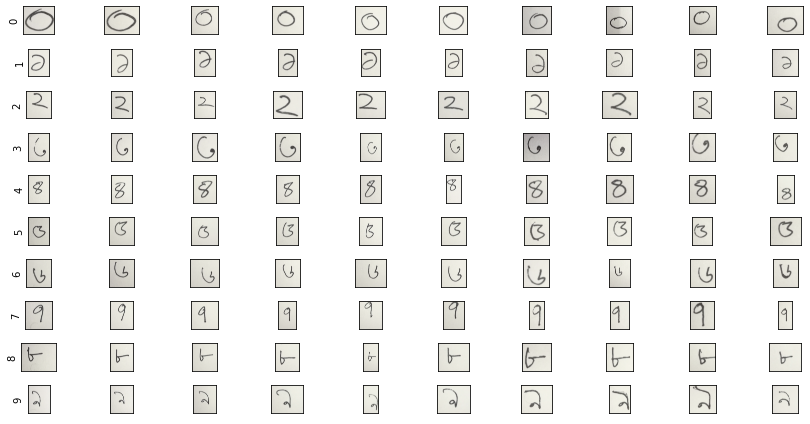

In [5]:
plt.figure(figsize=(12,6))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(10,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show()

In [6]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
            training_data.append([img_resized, class_num]) 
        except WException as e:
            pass
        
print(len(training_data))

100%|██████████| 14/14 [00:00<00:00, 98.17it/s] 

140


In [7]:
valid_data = []

for c in CATEGORIES:
    path = os.path.join(VALID_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            valid_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(valid_data))

100%|██████████| 3/3 [00:00<00:00, 76.07it/s]

30


In [8]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            test_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(test_data))

100%|██████████| 3/3 [00:00<00:00, 90.69it/s]

30


In [9]:
random.shuffle(training_data)
random.shuffle(valid_data)
# random.shuffle(test_data)

In [10]:
X_train = []
Y_train = []
# X_train.shape
for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (140, 224, 224, 3) Y_train= (140,)


In [11]:
X_valid = []
Y_valid = []

for img, label in valid_data:
    X_valid.append(img)
    Y_valid.append(label)
    
X_valid = np.array(X_valid).astype('float32').reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_valid = np.array(Y_valid)

print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")

X_valid= (30, 224, 224, 3) Y_valid= (30,)


In [12]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (30, 224, 224, 3) Y_test= (30,)


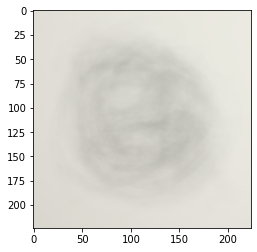

In [14]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [15]:
X_train_norm, X_valid_norm, X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img

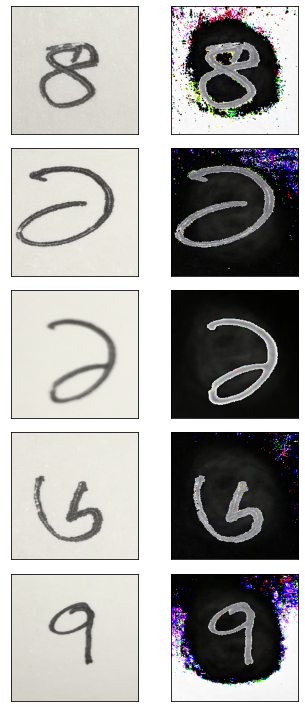

In [16]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [17]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),
    
    
    layers.Conv2D(filters=100, kernel_size=(3,3), strides=(2,2), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=50, kernel_size=(3,3), strides=(2,2), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=30, kernel_size=(3,3), strides=(2,2), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    
    layers.Flatten(),
    
    layers.Dense(units=1000),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=500),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(units=250),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(10),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 111, 111, 100)     2800      
                                                                 
 activation (Activation)     (None, 111, 111, 100)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 100)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 100)      400       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 50)        45050     
                                                                 
 activation_1 (Activation)   (None, 27, 27, 50)        0

In [18]:
#Compile the model
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [19]:
#Fit the model for validation
h = model.fit(x=X_train_norm, y=Y_train, epochs=100, validation_data=(X_valid_norm, Y_valid), batch_size=10)

Epoch 1/100
14/14 [==============================] - 4s 78ms/step - loss: 2.8664 - accuracy: 0.1071 - val_loss: 6.2654 - val_accuracy: 0.1333
Epoch 2/100
14/14 [==============================] - 0s 33ms/step - loss: 2.8141 - accuracy: 0.1286 - val_loss: 4.6518 - val_accuracy: 0.1667
Epoch 3/100
14/14 [==============================] - 0s 29ms/step - loss: 2.6292 - accuracy: 0.1714 - val_loss: 3.7456 - val_accuracy: 0.3000
Epoch 4/100
14/14 [==============================] - 0s 30ms/step - loss: 2.5057 - accuracy: 0.2071 - val_loss: 3.7367 - val_accuracy: 0.2333
Epoch 5/100
14/14 [==============================] - 0s 27ms/step - loss: 2.5668 - accuracy: 0.2071 - val_loss: 3.4592 - val_accuracy: 0.2667
Epoch 6/100
14/14 [==============================] - 0s 27ms/step - loss: 2.3964 - accuracy: 0.2286 - val_loss: 3.0300 - val_accuracy: 0.3667
Epoch 7/100
14/14 [==============================] - 0s 26ms/step - loss: 2.2885 - accuracy: 0.2071 - val_loss: 2.5680 - val_accuracy: 0.4667
Epoch 

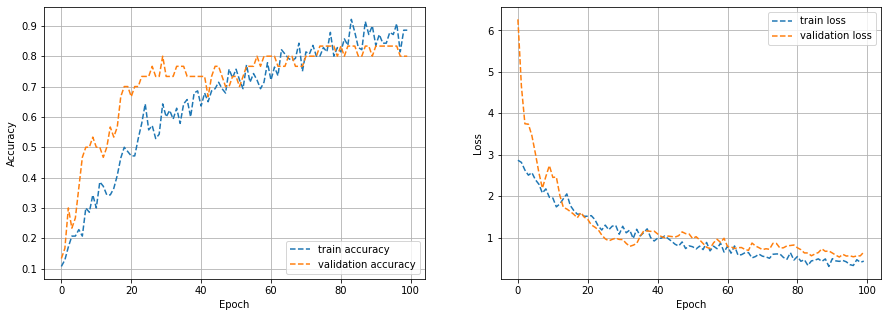

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [21]:
#Check test data accuracy
test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

1/1 [==============================] - 1s 525ms/step - loss: 0.8618 - accuracy: 0.7333

Test Accuracy: 0.7333333492279053

Test Loss: 0.861834704875946


(30, 224, 224, 3)
(30, 224, 224, 3)
(224, 224, 3)


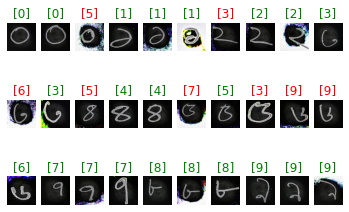

In [36]:
img_test = np.reshape(X_test_norm, [-1,224,224,3], order = 'F')
print(X_test_norm.shape)
print(img_test.shape)
print(img_test[0].shape)

predictions_new = model.predict(img_test)


for i in range(30):
    
    # plt.imshow(X_test_norm[i].astype('uint8'))
    plt.subplot(3 ,10,i+1)
    if Y_test[i] == np.argmax(predictions_new[i]):
        plt.title([np.argmax(predictions_new[i])], color='g')
    else:
        plt.title([np.argmax(predictions_new[i])], color='r')
    plt.axis('off')
    plt.xticks([]) 
    plt.yticks([])
    plt.imshow(X_test_norm[i].astype('uint8'))

In [37]:
model.save('bangla_digit_classifier.model', save_format = 'h5')